In [ ]:
import tensorflow as tf

# Test

In [ ]:
!unzip '/content/drive/MyDrive/image_recognition/data/image_data/test_img/test_balanced_10.zip'

Archive:  /content/drive/MyDrive/image_recognition/data/image_data/test_img/test_balanced_10.zip
   creating: test_balanced_10/blepharitis/
  inflating: test_balanced_10/blepharitis/crop_D0_0e53ec31-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced_10/blepharitis/crop_D0_18b12e74-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced_10/blepharitis/crop_D0_18b916cf-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced_10/blepharitis/crop_D0_18c58db2-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced_10/blepharitis/crop_D0_18c972f4-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced_10/blepharitis/crop_D0_18c9dfb6-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced_10/blepharitis/crop_D0_18cf9d99-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced_10/blepharitis/crop_D0_18e81d26-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced_10/blepharitis/crop_D0_3add1235-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balan

In [ ]:
def labeling_output(y_pred, threshold):
  pred = []
  for y in y_pred:
    if y[0] >= threshold:
      pred.append(1)
    else:
      pred.append(0)
    
  return pred

In [ ]:
import os
import cv2
import numpy as np
import pickle

# predict
base_path = '/content/test_balanced_10/Cataract'
name_lst = os.listdir(base_path)

model_path = '/content/drive/MyDrive/image_recognition/data/image_data/binary_models/Cataract_model'
eye_model = tf.keras.models.load_model(model_path)

with open('/content/drive/MyDrive/image_recognition/이중분류/zero_centering_pickle/Cataract_mean.pickle', 'rb') as f:
  mean_img = pickle.load(f)

sub_mean_img = lambda image: image - mean_img

img_list = []
for name in name_lst:
  img_path = base_path + '/' + name

  img = cv2.imread(img_path)
  img = sub_mean_img(img)
  img_list.append(img)


imgs = np.array(img_list)
y_pred = eye_model.predict(imgs)


1/1 [==============================] - 5s 5s/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
print(y_pred)
y_5 = labeling_output(y_pred, 0.5)
y_4 = labeling_output(y_pred, 0.4)
y_3 = labeling_output(y_pred, 0.3)

print(y_3, y_4, y_5)

[[0.06318718]
 [0.2553632 ]
 [0.07216539]
 [0.89079577]
 [0.3212436 ]
 [0.4460531 ]
 [0.92518276]
 [0.6845135 ]
 [0.9667538 ]
 [0.08344319]
 [0.06340044]
 [0.03046818]
 [0.99990493]
 [0.19215576]
 [1.        ]
 [0.02211215]]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0] [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0] [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]


In [ ]:
name = 'Nuclear_Sclerosis'
base_path = f'/content/test_balanced_10/{name}'
name_lst = os.listdir(base_path)

model_path = f'/content/drive/MyDrive/image_recognition/data/image_data/binary_models/{name}_model'
eye_model = tf.keras.models.load_model(model_path)

with open(f'/content/drive/MyDrive/image_recognition/이중분류/zero_centering_pickle/{name}_mean.pickle', 'rb') as f:
  mean_img = pickle.load(f)

sub_mean_img = lambda image: image - mean_img

img_list = []
for name in name_lst:
  img_path = base_path + '/' + name

  img = cv2.imread(img_path)
  img = sub_mean_img(img)
  img_list.append(img)


imgs = np.array(img_list)
y_pred = eye_model.predict(imgs)
y_pred

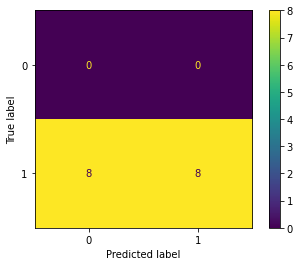

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion_matrix(true, pred)
y_test = np.ones(16)
cm3 = confusion_matrix(y_test, y_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,)
disp.plot()


# 6. label 값이 뽑히는 질병들에 포함되면 정답(1) / 없는경우 실패(0) (= model 에측값)
# 7. confusion matrix -> prediction: 포함되면(positive) 포함안되면(negative) / reality: 각 질병의 유무의 따라 True / False
# 8. standard value를 바꾸면서 confusion matrix가 어떻게 바뀌는지 (최대한 false negative 낮추는 방향으로 --> Recall 높이는 방향)




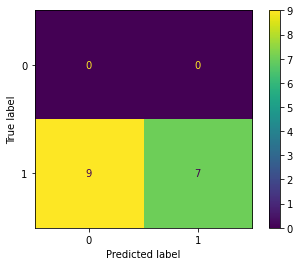

In [ ]:
y_test = np.ones(16)
cm4 = confusion_matrix(y_test, y_4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,)
disp.plot()

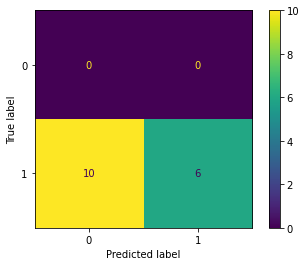

In [ ]:
y_test = np.ones(16)
cm5 = confusion_matrix(y_test, y_5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,)
disp.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1

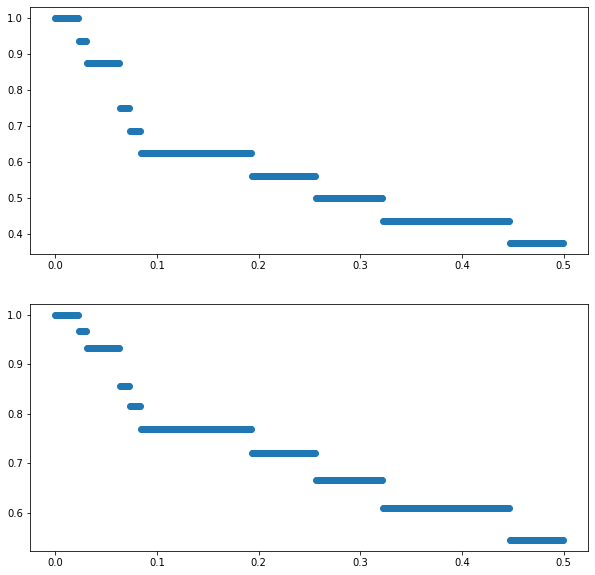

In [ ]:
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

num = 100

recalls, f1s = [], []
for i in range(5*num):
  y = labeling_output(y_pred, i*0.1/num)
  print(y)
  recalls.append(recall_score(y_test, y))
  f1s.append(f1_score(y_test, y))

print(recalls, f1s)

plt.figure(figsize=(10,10))
for i, p in enumerate([recalls, f1s]):
    plt.subplot(2,1,i+1)
    plt.grid(False)
    # plt.plot(np.arange(0, 0.5, 0.0001), p)
    plt.scatter(np.arange(0, 0.5, 0.1/num), p)
plt.show()
# print(recall_score(y_test, y_5))
# print(f1_score(y_test, y_5))

# print(recall_score(y_test, y_4))
# print(f1_score(y_test, y_4))

# print(recall_score(y_test, y_3))
# print(f1_score(y_test, y_3))


In [ ]:
eye_dic = {0:'Cataract', 1: 'Entropion', 2: 'Nuclear_Sclerosis', 3: 'PIH', 4: 'Xanthelasma', 5: 'blepharitis', 6: 'conjunctivitis', 
           7: 'corneal', 8: 'corneal_ulcer', 9: 'epiphora'}
names = ['Cataract', 'Entropion', 'Nuclear_Sclerosis', 'PIH', 'Xanthelasma', 'blepharitis', 'conjunctivitis', 'corneal', 'corneal_ulcer', 'epiphora']

# Real

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import zipfile

import cv2
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import pickle
from tqdm.notebook import tqdm

import splitfolders
from tensorflow.keras.applications.resnet import ResNet50, ResNet101, ResNet152
import datetime


## 데이터 Load



### zip파일 풀기

In [24]:
base_path = '/content/drive/MyDrive/image_recognition/data/image_data/img/'

In [5]:
name_lst = os.listdir('/content/drive/MyDrive/image_recognition/data/image_data/img')[5:6]
print(name_lst)

['Entropion.zip']


In [26]:
with zipfile.ZipFile(base_path + 'epiphora.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

### split folder

In [27]:
names = [name.split('.')[0] for name in name_lst]
print(names)

['crop_D20_0e614298-60a5-11ec-8402-0a7404972c70', 'crop_D30_0e4de729-60a5-11ec-8402-0a7404972c70', 'crop_D31_0e6091d7-60a5-11ec-8402-0a7404972c70', 'crop_D15_2f21c076-60a5-11ec-8402-0a7404972c70', 'crop_D13_333dc996-60a5-11ec-8402-0a7404972c70', 'crop_D35_0e775b25-60a5-11ec-8402-0a7404972c70', 'crop_D29_0e554857-60a5-11ec-8402-0a7404972c70', 'crop_D16_0e623fa3-60a5-11ec-8402-0a7404972c70', 'crop_D31_03680b36-60a5-11ec-8402-0a7404972c70', 'crop_D35_0e44af35-60a5-11ec-8402-0a7404972c70', 'crop_D13_03658395-60a5-11ec-8402-0a7404972c70', 'crop_D17_36ad0b03-60a5-11ec-8402-0a7404972c70', 'crop_D22_0e448539-60a5-11ec-8402-0a7404972c70', 'crop_D16_36ad802f-60a5-11ec-8402-0a7404972c70', 'crop_D21_0e646e62-60a5-11ec-8402-0a7404972c70', 'crop_D27_0e443206-60a5-11ec-8402-0a7404972c70', 'crop_D31_0e6a99c6-60a5-11ec-8402-0a7404972c70', 'crop_D13_0e42aafa-60a5-11ec-8402-0a7404972c70', 'crop_D19_36ace314-60a5-11ec-8402-0a7404972c70', 'crop_D10_0e57297e-60a5-11ec-8402-0a7404972c70', 'crop_D17_0e7a3c90-

In [30]:
splitfolders.ratio('/content/'+'epiphora', output=f'epiphora_dataset', seed=77, ratio=(0.8, 0.1, 0.1))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  5.71 files/s]
Copying files: 312 files [00:00, 1397.39 files/s]
Copying files: 638 files [00:00, 2095.96 files/s]
Copying files: 910 files [00:00, 2314.91 files/s]
Copying files: 1180 files [00:00, 2443.83 files/s]
Copying files: 1440 files [00:00, 1907.49 files/s]
Copying files: 1711 files [00:00, 2117.28 files/s]
Copying files: 2036 files [00:00, 2424.11 files/s]
Copying files: 2330 files [00:01, 2544.67 files/s]
Copying files: 2600 files [00:01, 2463.26 files/s]
Copying files: 2863 files [00:01, 2508.78 files/s]
Copying files: 3187 files [00:01, 2715.09 files/s]
Copying files: 3485 files [00:01, 2790.70 files/s]
Copying files: 3808 files [00:01, 2916.10 files/s]
Copying files: 4104 files [00:01, 2858.69 files/s]
Copying files: 4404 files [00:01, 2898.33 files/s]
Copying files: 4697 files [00:01, 2907.26 files/s]
Copying files: 4999 files [00:02, 2939.84 files/s]
Copying files: 5315 files [00:02, 3003.44 files

## Zero-Centering

In [31]:
#  train사진 경로 가져오기기
image_list = []

base_path = '/content/epiphora_dataset/train/'
sub_path = os.listdir('/content/epiphora_dataset/train/')

for i in sub_path:  
  image_path = base_path + i

  image_path2 = os.listdir(image_path)
  
  for files in image_path2:
    image_list.append(image_path + '/' + files)

In [32]:
# 이미지 수치화(array 변형)
images = []

for path in image_list:
  img = cv2.imread(path)

  images.append(img)



In [33]:
# train이미지 전체 평균
mean_img = np.mean(images, axis = 0)

In [1]:
!unzip /content/drive/MyDrive/image_recognition/data/image_data/test_img/multiclass_test_balanced.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: test_balanced/conjunctivitis/crop_D17_1251ed8b-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced/conjunctivitis/crop_D17_12534209-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced/conjunctivitis/crop_D17_15026707-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced/conjunctivitis/crop_D17_15061598-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced/conjunctivitis/crop_D17_18980785-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced/conjunctivitis/crop_D17_189fad97-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced/conjunctivitis/crop_D17_189fb62f-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced/conjunctivitis/crop_D17_18a0a13c-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced/conjunctivitis/crop_D17_18ab2d49-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanced/conjunctivitis/crop_D17_18abc5bf-60a5-11ec-8402-0a7404972c70.jpg  
  inflating: test_balanc

In [12]:
def labeling_output(y_pred, threshold):
  pred = []
  for y in y_pred:
    if y[0] >= threshold:
      pred.append(1)
    else:
      pred.append(0)
    
  return pred

In [55]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf

# predict
base_path = '/content/test_balanced/Cataract'
name_lst = os.listdir(base_path)
base_path_m = '/content/test_balanced/m'
name_lst_m = os.listdir(base_path_m)

model_path = '/content/drive/MyDrive/image_recognition/data/image_data/binary_models/final_Cataract'
eye_model = tf.keras.models.load_model(model_path)

with open('/content/drive/MyDrive/image_recognition/data/image_data/binary_train_pickle/Cataract_mean.pickle', 'rb') as f:
  mean_img = pickle.load(f)

sub_mean_img = lambda image: image - mean_img

img_list = []
for name in name_lst:
  img_path = base_path + '/' + name

  img = cv2.imread(img_path)
  img = sub_mean_img(img)
  img_list.append(img)

u_len = len(img_list)
y_test = np.ones(u_len)
print(y_test.shape)

for name in name_lst_m:
  img_path = base_path_m + '/' + name

  img = cv2.imread(img_path)
  img = sub_mean_img(img)
  img_list.append(img)

m_len = len(img_list) - u_len
y_test = np.concatenate((y_test, np.zeros(m_len)))
print(y_test.shape)

imgs = np.array(img_list)

print(u_len, m_len)


(576,)
(1152,)
576 576


In [56]:
y_pred = eye_model.predict(imgs)

36/36 [==============================] - 218s 6s/step


In [57]:
y_pred.shape, y_test.shape

((1152, 1), (1152,))

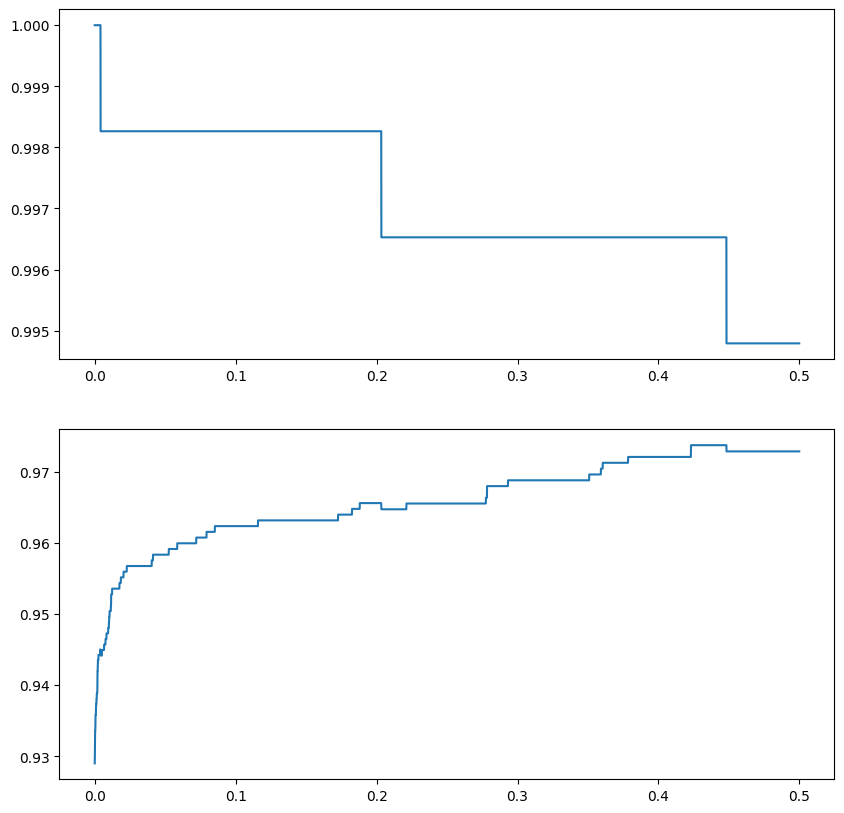

f1이 최댓값: 0.9737065309584394
그 때 recall: 0.9965277777777778


In [58]:
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

num = 1000

recalls, f1s, ys = [], [], []
for i in range(1, 5*num+1):
  y = labeling_output(y_pred, i*0.1/num)
  ys.append(y)
  recalls.append(recall_score(y_test, y))
  f1s.append(f1_score(y_test, y))

plt.figure(figsize=(10,10))
for i, p in enumerate([recalls, f1s]):
    plt.subplot(2,1,i+1)
    plt.grid(False)
    # plt.plot(np.arange(0, 0.5, 0.0001), p)
    plt.plot(np.arange(0, 0.5, 0.1/num), p)
plt.show()
# print(recall_score(y_test, y_5))
# print(f1_score(y_test, y_5))

# print(recall_score(y_test, y_4))
# print(f1_score(y_test, y_4))

# print(recall_score(y_test, y_3))
# print(f1_score(y_test, y_3))

idx = np.argmax(f1s)
print(f'f1이 최댓값: {f1s[idx]}')
print(f'그 때 recall: {recalls[idx]}')


0.9947916666666666
0.9728353140916808


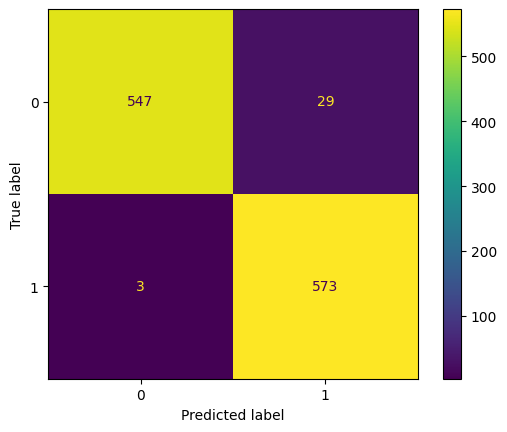

In [61]:
# 그래프를 통해 대충 어디쯤 할지 선정 -> confusion matrix로 확인


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

check = 4999

# confusion_matrix(true, pred)
cm = confusion_matrix(y_test, ys[check])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()

print(recall_score(y_test, ys[check]))
print(f1_score(y_test, ys[check]))

# 6. label 값이 뽑히는 질병들에 포함되면 정답(1) / 없는경우 실패(0) (= model 에측값)
# 7. confusion matrix -> prediction: 포함되면(positive) 포함안되면(negative) / reality: 각 질병의 유무의 따라 True / False
# 8. standard value를 바꾸면서 confusion matrix가 어떻게 바뀌는지 (최대한 false negative 낮추는 방향으로 --> Recall 높이는 방향)




In [62]:
print(idx)

4231


0.9965277777777778
0.9720575783234546


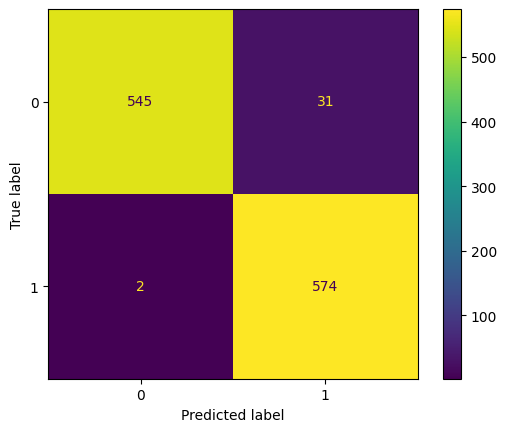

In [63]:
check_after = 4229

# confusion_matrix(true, pred)
cm = confusion_matrix(y_test, ys[check_after])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()

print(recall_score(y_test, ys[check_after]))
print(f1_score(y_test, ys[check_after]))

In [64]:
re_b = recall_score(y_test, ys[check])
f1_b = f1_score(y_test, ys[check])
re_a = recall_score(y_test, ys[check_after])
f1_a = f1_score(y_test, ys[check_after])

print(f'threshold : {(check+1)*0.0001} -> {(check_after+1)*0.0001:.4f}의 결과: ')
print(f'recall : {re_b:.4f} -> {re_a:.4f}')
print(f'f1_score : {f1_b:.4f} -> {f1_a:.4f}')


threshold : 0.5 -> 0.4230의 결과: 
recall : 0.9948 -> 0.9965
f1_score : 0.9728 -> 0.9721
